In [1]:
import numpy as np
import pandas as pd
import scipy.constants as cst
import scipy.special as spc
from scipy import integrate
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='grade3',ticks=True, grid=True, figsize=(12, 7),context='poster',fscale=1.5, spines=True, gridlines='--')
%matplotlib inline

In [291]:
lamda = 1064*10**(-9) #wavelength in nm
k_lamda=2*np.pi/lamda
m_Rb=1.44316*10**(-25) #in kg
Er=(cst.hbar*k_lamda)**2/(2*m_Rb)/cst.h/10**3 #in kHz
c=cst.physical_constants['speed of light in vacuum'][0]
tau_D1=2*np.pi*5.746*10**6
tau_D2=2*np.pi*6.065*10**6
Omaga_D1=2*np.pi*c/(794.9788509*10**-9)
Omaga_D2=2*np.pi*c/(780.241209686*10**-9)
m_Rb*cst.g/cst.h/Er/1000

1053297.0038147876

In [211]:
def potfactor(lamda):
    tmp1=2*tau_D2*np.pi*c**2/(2*Omaga_D2**3)*(1/(-2*np.pi*c/lamda+Omaga_D2)+1/(2*np.pi*c/lamda+Omaga_D2))
    tmp2=1*tau_D1*np.pi*c**2/(2*Omaga_D1**3)*(1/(-2*np.pi*c/lamda+Omaga_D1)+1/(2*np.pi*c/lamda+Omaga_D1))
    return tmp1+tmp2

def R(w0,z,lamda):
    zR=np.pi*w0**2/lamda
    return w0*np.sqrt(1+(z/zR)**2)

def wz(w0,z,lamda):
    zR=np.pi*w0**2/lamda
    return w0*np.sqrt(1+(z/zR)**2)

def Egauss(e0, w0,lamda, r, z):
    s1,s2=np.meshgrid(r,z)
    #print(s1,s2)
    tmp=0.5*(s1**2)*np.abs(s2)/(s2**2+(np.pi*w0**2/lamda)**2)
    #print(-(s1**2)/(wz(w0,s2,lamda)**2))
    s=e0*w0/wz(w0,s2,lamda)*np.exp(-(s1**2)/(wz(w0,s2,lamda)**2)-2j*np.pi/lamda*(s2+tmp)+1j*np.arctan(s2*lamda/(np.pi*w0**2)))
    return s

def latticepotential(P, w0,lamda, r, z):
    s1,s2=np.meshgrid(r,z)
    tmp=np.sqrt(2*P/(np.pi*w0**2))
    Etotal=Egauss(tmp, w0,lamda, r, z)*np.exp(1j*2*np.pi/lamda*s2)+Egauss(tmp, w0,lamda, r, z)*np.exp(1j*np.pi-1j*2*np.pi/lamda*s2)
    return -potfactor(lamda)*np.abs(Etotal)**2/cst.h/Er/1000

def trappotential(P, w0,lamda, r, z):
    s1,s2=np.meshgrid(r,z)
    tmp=np.sqrt(2*P/(np.pi*w0**2))
    Etotal=Egauss(tmp, w0,lamda, r, z)
    return -potfactor(lamda)*np.abs(Etotal)**2/cst.h/Er/1000


def latticedepth(P, w0,lamda):
    return (-latticepotential(P, w0,lamda, 0, 0)+latticepotential(P, w0,lamda, 0, 0.25*lamda))[0][0]

## Dimple Trap

In [308]:
dimplewaist=11*10**-6
dimplepowerunit=0.0005 
dimplepower=3*dimplepowerunit #in unit of W ,1V equals 0.5mW
dimplelamda=850*10**-9

print('When waist is %0.2f um, power is %0.2f mW, dimple trap depth is %0.2f Er'
      %(dimplewaist*10**6,dimplepower*10**3,trappotential(dimplepower, dimplewaist,dimplelamda, [0], [0])[0,0]))

When waist is 11.00 um, power is 1.50 mW, dimple trap depth is 38.80 Er


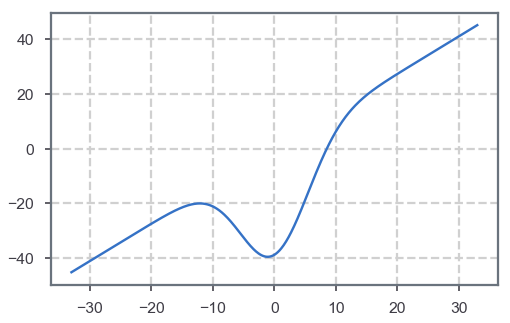

In [317]:
plt.figure(figsize=(8,5))
plt.plot(np.linspace(-33,33,500),-trappotential(dimplepower, dimplewaist,dimplelamda, np.linspace(-33,33,500)*10**-6, [0])[0,:]
         +1.3*m_Rb*cst.g/cst.h/Er/1000*np.linspace(-33,33,500)*10**-6)

## Z Lattice Depth

In [298]:
zlatticewaist=107.*10**-6
zlatticepowerunit=0.020 
zlatticepower=5.5*zlatticepowerunit*0.86 #in unit of W ,1V equals 0.5mW
zlatticelamda=1064*10**-9

print('When waist is %0.2f um, power is %0.2f mW, Z lattice trap depth is %0.2f Er'
      %(zlatticewaist*10**6,zlatticepower*10**3,latticedepth(zlatticepower, zlatticewaist,zlatticelamda)))

When waist is 107.00 um, power is 94.60 mW, Z lattice trap depth is 32.93 Er


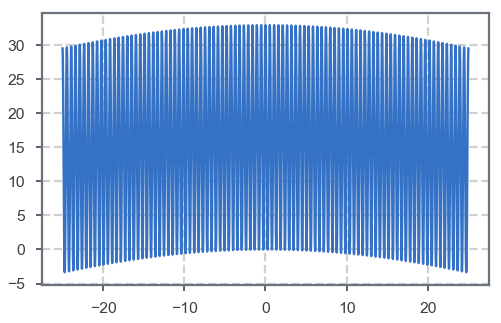

In [354]:
plt.figure(figsize=(8,5))
#plt.ylim((-33.,-30))
plt.plot(np.linspace(-25,25,30000),
         -1*latticepotential(zlatticepower, zlatticewaist,zlatticelamda, [0],np.linspace(-25,25,30000)*10**-6)[:,0]+1*latticepotential(zlatticepower, zlatticewaist,zlatticelamda, np.linspace(-25,25,30000)*10**-6,[0.25*lamda])[0,:])

In [355]:
np.log(1.15)

0.13976194237515863

In [357]:
data = pd.DataFrame(np.arange(15).reshape(3,5),index=['one','two','three'],columns=['a','b','c','d','e'])

In [360]:
data.iloc[:,1:]

,b,c,d,e
one,1,2,3,4
two,6,7,8,9
three,11,12,13,14


In [359]:
data

,a,b,c,d,e
one,0,1,2,3,4
two,5,6,7,8,9
three,10,11,12,13,14
